In [2]:
import os

IMAGE_DIR = "/Users/sultan/Documents/project/Brain_Tumor_classification/archive/Training"

# Walk through all subdirectories and count images
image_count = sum(len([f for f in files if f.endswith(('.jpg', '.png'))]) for _, _, files in os.walk(IMAGE_DIR))

print("Total Number of Images:", image_count)


Total Number of Images: 5712


In [3]:
import os

IMAGE_DIR = "/Users/sultan/Documents/project/Brain_Tumor_classification/archive/Training"

# List subdirectories
subdirs = [d for d in os.listdir(IMAGE_DIR) if os.path.isdir(os.path.join(IMAGE_DIR, d))]
print(f"✅ Found Subdirectories: {subdirs}")

# Check if images exist in subdirectories
image_files = []
for subdir in subdirs:
    subdir_path = os.path.join(IMAGE_DIR, subdir)
    files = [f for f in os.listdir(subdir_path) if f.endswith(('.jpg', '.png'))]
    image_files.extend(files)

print(f"✅ Total Images Found in Subdirectories: {len(image_files)}")
print("First 10 Images:", image_files[:10])


✅ Found Subdirectories: ['pituitary', 'notumor', 'glioma', 'meningioma']
✅ Total Images Found in Subdirectories: 5712
First 10 Images: ['Tr-pi_0505.jpg', 'Tr-pi_0263.jpg', 'Tr-pi_0277.jpg', 'Tr-pi_1169.jpg', 'Tr-pi_0511.jpg', 'Tr-pi_0539.jpg', 'Tr-pi_1141.jpg', 'Tr-pi_1155.jpg', 'Tr-pi_1182.jpg', 'Tr-pi_1196.jpg']


In [ ]:
import os
import mysql.connector
import numpy as np
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# ✅ Database Configuration
DB_CONFIG = {
    "host": "localhost",
    "user": "root",  # Change if needed
    "password": "9108422282",   # Enter your MySQL password
    "database": "brain_tumor",
}

# ✅ Connect to MySQL
conn = mysql.connector.connect(**DB_CONFIG)
cursor = conn.cursor()

# ✅ Load Pretrained Model (VGG16 for Feature Extraction)
model = VGG16(weights="imagenet", include_top=False, pooling="avg")

# ✅ Define Image Directory
IMAGE_DIR = "/Users/sultan/Documents/project/Brain_Tumor_classification/archive/Training"
BATCH_SIZE = 10  # Number of images to process at a time

# ✅ Function to Convert Feature Vector to BLOB
def convert_to_blob(feature_vector):
    return feature_vector.tobytes()

# ✅ Function to Insert Features in Batches
def insert_features_batch(batch):
    sql = "INSERT INTO MRI_FEATURES (IMAGE_NAME, FEATURE_VECTOR) VALUES (%s, %s)"
    cursor.executemany(sql, batch)
    conn.commit()

# ✅ Process Images in Batches (Include Subdirectories)
image_files = []
for root, _, files in os.walk(IMAGE_DIR):
    for file in files:
        if file.endswith((".jpg", ".png")):
            image_files.append(os.path.join(root, file))  # Use full path

batch_data = []

for idx, image_path in enumerate(image_files, 1):
    image_name = os.path.basename(image_path)  # Extract only filename
    
    # ✅ Load and Preprocess Image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # ✅ Extract Features
    features = model.predict(img_array).flatten()
    feature_blob = convert_to_blob(features)

    # ✅ Append to Batch
    batch_data.append((image_name, feature_blob))

    # ✅ Insert in Batches
    if len(batch_data) >= BATCH_SIZE:
        insert_features_batch(batch_data)
        print(f"Inserted {len(batch_data)} images into the database.")
        batch_data = []

# ✅ Insert Remaining Data
if batch_data:
    insert_features_batch(batch_data)
    print(f"Inserted remaining {len(batch_data)} images.")

# ✅ Close Connection
cursor.close()
conn.close()
print("✅ Feature Extraction & Database Insertion Completed!")


In [24]:
import os
import mysql.connector

# ✅ Database Configuration
DB_CONFIG = {
    "host": "localhost",
    "user": "root",  # Change if needed
    "password": "9108422282",   # Enter your MySQL password
    "database": "brain_tumor",
}

# ✅ Connect to MySQL
conn = mysql.connector.connect(**DB_CONFIG)
cursor = conn.cursor()

# ✅ Define Image Directory
IMAGE_DIR = "/Users/sultan/Documents/project/Brain_Tumor_classification/archive/Training"
BATCH_SIZE = 10  # Number of images to process at a time

# ✅ Function to Insert Image Names in Batches
def insert_image_names_batch(batch):
    sql = "INSERT INTO MRI_IMAGES (IMAGE_NAME) VALUES (%s)"
    cursor.executemany(sql, batch)
    conn.commit()

# ✅ Process Images in Batches (Include Subdirectories)
image_files = []
for root, _, files in os.walk(IMAGE_DIR):
    for file in files:
        if file.endswith((".jpg", ".png")):
            image_files.append((file,))  # Store only file name as tuple

batch_data = []

for idx, (image_name,) in enumerate(image_files, 1):
    batch_data.append((image_name,))

    # ✅ Insert in Batches
    if len(batch_data) >= BATCH_SIZE:
        insert_image_names_batch(batch_data)
        print(f"Inserted {len(batch_data)} image names into the database.")
        batch_data = []

# ✅ Insert Remaining Data
if batch_data:
    insert_image_names_batch(batch_data)
    print(f"Inserted remaining {len(batch_data)} image names.")

# ✅ Close Connection
cursor.close()
conn.close()
print("✅ Image Processing & Database Insertion Completed!")


Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10 image names into the database.
Inserted 10

In [25]:
import mysql.connector
import numpy as np
import os
import cv2
import pywt
from skimage.feature import graycomatrix, graycoprops

# ✅ Database Configuration
DB_CONFIG = {
    "host": "localhost",
    "user": "root",
    "password": "9108422282",  # Change this for security
    "database": "brain_tumor",
}

# ✅ Connect to MySQL
conn = mysql.connector.connect(**DB_CONFIG)
cursor = conn.cursor()

# ✅ Define Image Directory
IMAGE_DIR = "/Users/sultan/Documents/project/Brain_Tumor_classification/archive/Training"

# ✅ Function to Extract GLCM Features
def extract_glcm_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray, distances=[1], angles=[0], symmetric=True, normed=True)

    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    return np.array([contrast, dissimilarity, homogeneity, energy, correlation], dtype=np.float32)

# ✅ Function to Extract Wavelet Features
def extract_wavelet_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    coeffs = pywt.wavedec2(gray, 'haar', level=2)

    features = []
    for coeff in coeffs:
        if isinstance(coeff, tuple):
            coeff = np.concatenate([c.flatten() for c in coeff])
        else:
            coeff = coeff.flatten()
        features.extend(coeff[:10])  # Take first 10 values from each level

    return np.array(features, dtype=np.float32)

# ✅ Function to Extract Histogram Features
def extract_histogram_features(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return hist.flatten().astype(np.float32)

# ✅ Function to Convert Features to BLOB
def convert_to_blob(feature_vector):
    return feature_vector.tobytes()

# ✅ Insert Handcrafted Features into MySQL
def insert_features(image_name, glcm_features, wavelet_features, hist_features):
    feature_vector = np.concatenate([glcm_features, wavelet_features, hist_features])
    feature_blob = convert_to_blob(feature_vector)

    try:
        # ✅ Check if the image already exists in the table
        cursor.execute("SELECT FEATURE_VECTOR FROM MRI_FEATURES WHERE IMAGE_NAME = %s", (image_name,))
        existing_record = cursor.fetchone()

        if existing_record:
            # ✅ Combine Existing Deep Features with Handcrafted Features
            existing_blob = np.frombuffer(existing_record[0], dtype=np.float32)
            combined_features = np.concatenate([existing_blob, feature_vector])
            combined_blob = convert_to_blob(combined_features)

            # ✅ Update the existing row
            sql = "UPDATE MRI_FEATURES SET FEATURE_VECTOR = %s WHERE IMAGE_NAME = %s"
            cursor.execute(sql, (combined_blob, image_name))
        else:
            # ✅ Insert new handcrafted features if no deep features exist
            sql = "INSERT INTO MRI_FEATURES (IMAGE_NAME, FEATURE_VECTOR) VALUES (%s, %s)"
            cursor.execute(sql, (image_name, feature_blob))

        conn.commit()
    except Exception as e:
        print(f"⚠️ Error inserting features for {image_name}: {e}")

# ✅ Process Images
image_files = []
for root, _, files in os.walk(IMAGE_DIR):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):
            image_files.append(os.path.join(root, file))

total_images = len(image_files)
print(f"✅ Found {total_images} images in dataset. Processing...")

for idx, image_path in enumerate(image_files, 1):
    image_name = os.path.basename(image_path)

    # ✅ Load Image
    image = cv2.imread(image_path)
    if image is None:
        print(f"⚠️ Skipping {image_name} (could not load image)")
        continue

    # ✅ Extract Features
    glcm_features = extract_glcm_features(image)
    wavelet_features = extract_wavelet_features(image)
    hist_features = extract_histogram_features(image)

    # ✅ Store Features in MySQL
    insert_features(image_name, glcm_features, wavelet_features, hist_features)

    if idx % 100 == 0:
        print(f"✅ Processed {idx}/{total_images} images...")

# ✅ Close Connection
cursor.close()
conn.close()

print("✅ Handcrafted Feature Extraction Completed & Stored in Database!")


✅ Found 5712 images in dataset. Processing...
✅ Processed 100/5712 images...
✅ Processed 200/5712 images...
✅ Processed 300/5712 images...
✅ Processed 400/5712 images...
✅ Processed 500/5712 images...
✅ Processed 600/5712 images...
✅ Processed 700/5712 images...
✅ Processed 800/5712 images...
✅ Processed 900/5712 images...
✅ Processed 1000/5712 images...
✅ Processed 1100/5712 images...
✅ Processed 1200/5712 images...
✅ Processed 1300/5712 images...
✅ Processed 1400/5712 images...
✅ Processed 1500/5712 images...
✅ Processed 1600/5712 images...
✅ Processed 1700/5712 images...
✅ Processed 1800/5712 images...
✅ Processed 1900/5712 images...
✅ Processed 2000/5712 images...
✅ Processed 2100/5712 images...
✅ Processed 2200/5712 images...
✅ Processed 2300/5712 images...
✅ Processed 2400/5712 images...
✅ Processed 2500/5712 images...
✅ Processed 2600/5712 images...
✅ Processed 2700/5712 images...
✅ Processed 2800/5712 images...
✅ Processed 2900/5712 images...
✅ Processed 3000/5712 images...
✅ P

In [26]:
import mysql.connector
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ✅ Database Connection
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="9108422282",  # Change for security
    database="brain_tumor"
)
cursor = conn.cursor()

# ✅ Fetch Data
cursor.execute("SELECT IMAGE_NAME, FEATURE_VECTOR FROM MRI_FEATURES")
records = cursor.fetchall()

# ✅ Convert to Numpy
features_dict = {}
for image_name, feature_blob in records:
    feature_vector = np.frombuffer(feature_blob, dtype=np.float32)
    features_dict[image_name] = feature_vector

# ✅ Close Connection
cursor.close()
conn.close()

print(f"✅ Retrieved {len(features_dict)} feature vectors!")

# Convert to Matrix
image_names = list(features_dict.keys())
feature_matrix = np.array(list(features_dict.values()))



✅ Retrieved 5712 feature vectors!


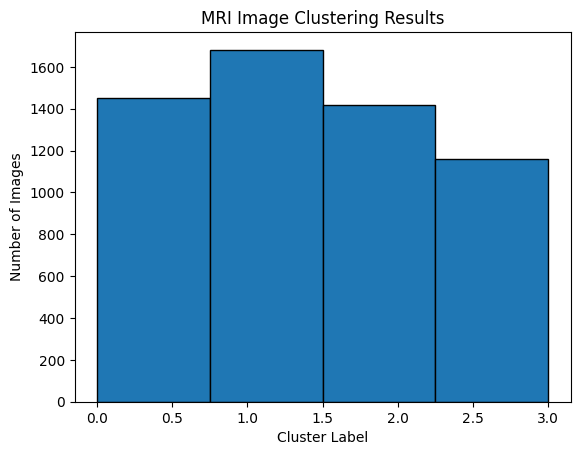

In [27]:
# ✅ Apply K-Means Clustering (4 clusters for 4 tumor classes)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(feature_matrix)

# ✅ Visualize Cluster Distribution
plt.hist(labels, bins=4, edgecolor='black')
plt.xlabel("Cluster Label")
plt.ylabel("Number of Images")
plt.title("MRI Image Clustering Results")
plt.show()

# ✅ Save Cluster Assignments
cluster_dict = {image_names[i]: labels[i] for i in range(len(image_names))}


In [28]:
# ✅ Reconnect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="9108422282",
    database="brain_tumor"
)
cursor = conn.cursor()

# ✅ Check if CLUSTER_LABEL column exists before adding
cursor.execute("SHOW COLUMNS FROM MRI_FEATURES LIKE 'CLUSTER_LABEL'")
result = cursor.fetchone()  # Fetch one row

if not result:  # If column does not exist
    cursor.execute("ALTER TABLE MRI_FEATURES ADD COLUMN CLUSTER_LABEL INT DEFAULT -1")
    print("✅ CLUSTER_LABEL column added.")
else:
    print("⚠️ CLUSTER_LABEL column already exists. Skipping ALTER TABLE.")

# ✅ Update Cluster Labels in Database
for image_name, cluster_label in cluster_dict.items():
    sql = "UPDATE MRI_FEATURES SET CLUSTER_LABEL = %s WHERE IMAGE_NAME = %s"
    cursor.execute(sql, (int(cluster_label), image_name))

conn.commit()
cursor.close()
conn.close()

print("✅ Cluster labels stored in MySQL successfully!")


⚠️ CLUSTER_LABEL column already exists. Skipping ALTER TABLE.
✅ Cluster labels stored in MySQL successfully!


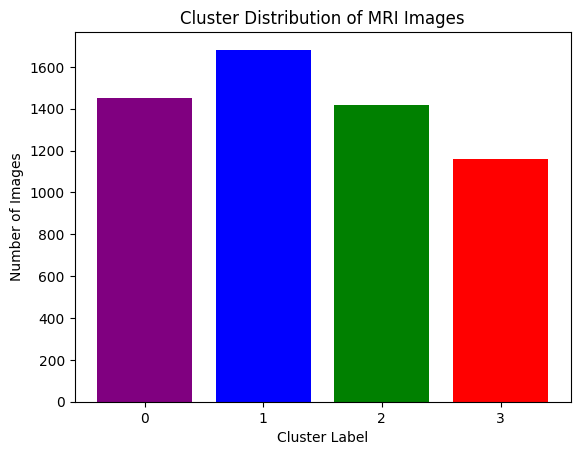

In [10]:
import mysql.connector
import matplotlib.pyplot as plt

# ✅ Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="9108422282",
    database="brain_tumor"
)
cursor = conn.cursor()

# ✅ Fetch Cluster Counts
cursor.execute("SELECT CLUSTER_LABEL, COUNT(*) FROM MRI_FEATURES GROUP BY CLUSTER_LABEL")
cluster_counts = cursor.fetchall()

# ✅ Close Connection
cursor.close()
conn.close()

# ✅ Visualize Cluster Distribution
clusters, counts = zip(*cluster_counts)
plt.bar(clusters, counts, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Cluster Label")
plt.ylabel("Number of Images")
plt.title("Cluster Distribution of MRI Images")
plt.xticks(clusters)
plt.show()


In [11]:
from sklearn.metrics import silhouette_score
import numpy as np

# ✅ Convert to Matrix
features = np.array(list(features_dict.values()))
labels = np.array(list(cluster_dict.values()))

# ✅ Compute Silhouette Score
score = silhouette_score(features, labels)
print(f"🔍 Silhouette Score: {score:.4f}")

# Interpretation:
# - **Near 1** → Well-separated clusters
# - **Near 0** → Overlapping clusters
# - **Negative** → Misclassified clusters


🔍 Silhouette Score: 0.2781


In [12]:
import mysql.connector
import numpy as np
import pickle
from sklearn.cluster import KMeans

# ✅ Database Configuration
DB_CONFIG = {
    "host": "localhost",
    "user": "root",
    "password": "9108422282",
    "database": "brain_tumor",
}

# ✅ Connect to MySQL
conn = mysql.connector.connect(**DB_CONFIG)
cursor = conn.cursor()

# ✅ Fetch Stored Features from the Database
cursor.execute("SELECT FEATURE_VECTOR FROM MRI_FEATURES")
feature_vectors = cursor.fetchall()

# ✅ Convert to NumPy Array
train_features = np.array([np.frombuffer(f[0], dtype=np.float32) for f in feature_vectors])

print(f"✅ Loaded {train_features.shape[0]} feature vectors from the database!")

# ✅ Train K-Means on Training Features
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust clusters as needed
kmeans.fit(train_features)

# ✅ Save the Trained Model
with open("kmeans_model.pkl", "wb") as file:
    pickle.dump(kmeans, file)

print("✅ K-Means Model Trained and Saved Successfully! 🚀")

# ✅ Close Connection
cursor.close()
conn.close()


✅ Loaded 5712 feature vectors from the database!
✅ K-Means Model Trained and Saved Successfully! 🚀


In [14]:
print(f"Feature Vector Shape (Training): {features.shape}")


Feature Vector Shape (Training): (5712, 1094)


In [29]:
import numpy as np
import cv2
from skimage.feature import graycomatrix, graycoprops

def extract_glcm_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    glcm = graycomatrix(gray, distances=[1], angles=[0], symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    return np.array([contrast, dissimilarity, homogeneity, energy, correlation])


In [30]:
glcm_features = extract_glcm_features(image)
wavelet_features = extract_wavelet_features(image)
hist_features = extract_histogram_features(image)

print(f"{image_name}: GLCM Features = {len(glcm_features)}, "
      f"Wavelet Features = {len(wavelet_features)}, "
      f"Histogram Features = {len(hist_features)}")


Tr-me_0417.jpg: GLCM Features = 5, Wavelet Features = 30, Histogram Features = 256


In [16]:
print(f"Feature Vector Shape (Testing): {len(feature_vector)}")


Feature Vector Shape (Testing): 1094


In [31]:
print(f"GLCM Features: {len(glcm_features)}")
print(f"Wavelet Features: {len(wavelet_features)}")
print(f"Histogram Features: {len(hist_features)}")
print(f"Total Training Feature Length: {len(feature_vector)}")  # Should be 803


GLCM Features: 5
Wavelet Features: 30
Histogram Features: 256
Total Training Feature Length: 1385


In [33]:
import mysql.connector
import numpy as np

# ✅ Database Connection
DB_CONFIG = {
    "host": "localhost",
    "user": "root",
    "password": "9108422282",
    "database": "brain_tumor",
}

conn = mysql.connector.connect(**DB_CONFIG)
cursor = conn.cursor()

# ✅ Fetch 5 Sample Features
cursor.execute("SELECT IMAGE_NAME, FEATURE_VECTOR FROM MRI_FEATURES LIMIT 5")
results = cursor.fetchall()

# ✅ Convert BLOB back to numpy array
for image_name, feature_blob in results:
    feature_vector = np.frombuffer(feature_blob, dtype=np.float32)
    print(f"{image_name}: Feature Length = {len(feature_vector)}")

# ✅ Close Connection
cursor.close()
conn.close()


Tr-pi_0505.jpg: Feature Length = 1385
Tr-pi_0263.jpg: Feature Length = 1385
Tr-pi_0277.jpg: Feature Length = 1385
Tr-pi_1169.jpg: Feature Length = 1385
Tr-pi_0511.jpg: Feature Length = 1385


In [35]:
import os
import cv2
import pywt
import numpy as np
import mysql.connector
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color

# === CONFIG ===
TEST_DIR = "/Users/sultan/Documents/project/Brain_Tumor_classification/archive/Testing"
IMAGE_SIZE = (128, 128)

# === Connect to MySQL ===
conn = mysql.connector.connect(
    host="localhost",
    user="root",        # replace with your MySQL username
    password="9108422282",    # replace with your MySQL password
    database="brain_tumor"
)
cursor = conn.cursor()

# === Create Table for Testing Features if not exists ===
cursor.execute("""
CREATE TABLE IF NOT EXISTS MRI_TEST_FEATURES (
    ID INT AUTO_INCREMENT PRIMARY KEY,
    IMAGE_NAME VARCHAR(255) NOT NULL,
    GLCM_FEATURES TEXT NOT NULL,
    WAVELET_FEATURES TEXT NOT NULL,
    HISTOGRAM_FEATURES TEXT NOT NULL
);
""")

# === Feature Extraction Functions ===
def extract_glcm_features(gray_img):
    glcm = greycomatrix(gray_img, [1], [0], 256, symmetric=True, normed=True)
    contrast = greycoprops(glcm, 'contrast')[0, 0]
    correlation = greycoprops(glcm, 'correlation')[0, 0]
    energy = greycoprops(glcm, 'energy')[0, 0]
    homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
    ASM = greycoprops(glcm, 'ASM')[0, 0]
    return [contrast, correlation, energy, homogeneity, ASM]

def extract_wavelet_features(gray_img):
    coeffs = pywt.wavedec2(gray_img, 'db1', level=2)
    features = []
    for detail_level in coeffs[1:]:  # Skip approximation coeffs
        for arr in detail_level:
            features.extend([
                np.mean(arr), np.std(arr), np.max(arr),
                np.min(arr), np.median(arr)
            ])
    return features  # 6 sub-bands * 5 = 30 features

def extract_histogram_features(gray_img):
    hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist.tolist()

# === Process Images ===
for folder in os.listdir(TEST_DIR):
    folder_path = os.path.join(TEST_DIR, folder)
    if not os.path.isdir(folder_path):
        continue
    for file in os.listdir(folder_path):
        if file.endswith(('.jpg', '.png')):
            img_path = os.path.join(folder_path, file)
            try:
                image = cv2.imread(img_path)
                image = cv2.resize(image, IMAGE_SIZE)
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Extract features
                glcm_feat = extract_glcm_features(gray)
                wavelet_feat = extract_wavelet_features(gray)
                hist_feat = extract_histogram_features(gray)

                # Combine features
                glcm_str = ",".join(map(str, glcm_feat))
                wavelet_str = ",".join(map(str, wavelet_feat))
                hist_str = ",".join(map(str, hist_feat))

                # Insert into MySQL
                sql = """
                    INSERT INTO MRI_TEST_FEATURES (IMAGE_NAME, GLCM_FEATURES, WAVELET_FEATURES, HISTOGRAM_FEATURES)
                    VALUES (%s, %s, %s, %s)
                """
                cursor.execute(sql, (file, glcm_str, wavelet_str, hist_str))
                print(f"[✓] Stored features for {file}")
            except Exception as e:
                print(f"[✗] Failed {file}: {e}")

# === Finalize ===
conn.commit()
cursor.close()
conn.close()
print("✅ All testing features extracted and stored in MySQL.")


/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-pi_0233.jpg
[✓] Stored features for Te-pi_0227.jpg
[✓] Stored features for Te-pi_0019.jpg
[✓] Stored features for Te-pi_0031.jpg
[✓] Stored features for Te-pi_0025.jpg
[✓] Stored features for Te-pi_0186.jpg
[✓] Stored features for Te-pi_0192.jpg
[✓] Stored features for Te-pi_0179.jpg
[✓] Stored features for Te-pi_0145.jpg
[✓] Stored features for Te-pi_0151.jpg
[✓] Stored features for Te-pi_0150.jpg
[✓] Stored features for Te-pi_0144.jpg
[✓] Stored features for Te-pi_0178.jpg
[✓] Stored features for Te-pi_0193.jpg
[✓] Stored features for Te-pi_0187.jpg
[✓] Stored features for Te-pi_0024.jpg
[✓] Stored features for Te-pi_0030.jpg
[✓] Stored features for Te-pi_0018.jpg
[✓] Stored features for Te-pi_0226.jpg
[✓] Stored features for Te-pi_0232.jpg
[✓] Stored features for Te-pi_0218.jpg
[✓] Stored features for Te-pi_0224.jpg
[✓] Stored features for Te-pi_0230.jpg
[✓] Stored features for Te-pi_0026.jpg
[✓] Stored features for Te-pi_0032.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-pi_0153.jpg
[✓] Stored features for Te-pi_0184.jpg
[✓] Stored features for Te-pi_0190.jpg
[✓] Stored features for Te-pi_0033.jpg
[✓] Stored features for Te-pi_0027.jpg
[✓] Stored features for Te-pi_0231.jpg
[✓] Stored features for Te-pi_0225.jpg
[✓] Stored features for Te-pi_0219.jpg
[✓] Stored features for Te-pi_0221.jpg
[✓] Stored features for Te-pi_0235.jpg
[✓] Stored features for Te-pi_0209.jpg
[✓] Stored features for Te-pi_0023.jpg
[✓] Stored features for Te-pi_0037.jpg
[✓] Stored features for Te-pi_0194.jpg
[✓] Stored features for Te-pi_0180.jpg
[✓] Stored features for Te-pi_0157.jpg
[✓] Stored features for Te-pi_0143.jpg
[✓] Stored features for Te-pi_0142.jpg
[✓] Stored features for Te-pi_0156.jpg
[✓] Stored features for Te-pi_0181.jpg
[✓] Stored features for Te-pi_0195.jpg
[✓] Stored features for Te-pi_0036.jpg
[✓] Stored features for Te-pi_0022.jpg
[✓] Stored features for Te-pi_0208.jpg
[✓] Stored features for Te-pi_0234.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-pi_0183.jpg
[✓] Stored features for Te-pi_0197.jpg
[✓] Stored features for Te-pi_0140.jpg
[✓] Stored features for Te-pi_0154.jpg
[✓] Stored features for Te-pi_0168.jpg
[✓] Stored features for Te-pi_0169.jpg
[✓] Stored features for Te-pi_0155.jpg
[✓] Stored features for Te-pi_0141.jpg
[✓] Stored features for Te-pi_0196.jpg
[✓] Stored features for Te-pi_0182.jpg
[✓] Stored features for Te-pi_0021.jpg
[✓] Stored features for Te-pi_0035.jpg
[✓] Stored features for Te-pi_0223.jpg
[✓] Stored features for Te-pi_0237.jpg
[✓] Stored features for Te-pi_0293.jpg
[✓] Stored features for Te-pi_0287.jpg
[✓] Stored features for Te-piTr_0000.jpg
[✓] Stored features for Te-pi_0278.jpg
[✓] Stored features for Te-pi_0250.jpg
[✓] Stored features for Te-pi_0244.jpg
[✓] Stored features for Te-pi_0091.jpg
[✓] Stored features for Te-pi_0085.jpg
[✓] Stored features for Te-pi_0052.jpg
[✓] Stored features for Te-pi_0046.jpg
[✓] Stored features for Te-pi_0126.jpg
[✓] Stored features for

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-pi_0053.jpg
[✓] Stored features for Te-pi_0084.jpg
[✓] Stored features for Te-pi_0090.jpg
[✓] Stored features for Te-pi_0245.jpg
[✓] Stored features for Te-pi_0251.jpg
[✓] Stored features for Te-pi_0279.jpg
[✓] Stored features for Te-piTr_0001.jpg
[✓] Stored features for Te-pi_0286.jpg
[✓] Stored features for Te-pi_0292.jpg
[✓] Stored features for Te-pi_0284.jpg
[✓] Stored features for Te-pi_0290.jpg
[✓] Stored features for Te-piTr_0003.jpg
[✓] Stored features for Te-pi_0247.jpg
[✓] Stored features for Te-pi_0253.jpg
[✓] Stored features for Te-pi_0086.jpg
[✓] Stored features for Te-pi_0092.jpg
[✓] Stored features for Te-pi_0079.jpg
[✓] Stored features for Te-pi_0045.jpg
[✓] Stored features for Te-pi_0051.jpg
[✓] Stored features for Te-pi_0119.jpg
[✓] Stored features for Te-pi_0131.jpg
[✓] Stored features for Te-pi_0125.jpg
[✓] Stored features for Te-pi_0124.jpg
[✓] Stored features for Te-pi_0130.jpg
[✓] Stored features for Te-pi_0118.jpg
[✓] Stored features f

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remove

[✓] Stored features for Te-pi_0252.jpg
[✓] Stored features for Te-pi_0246.jpg
[✓] Stored features for Te-piTr_0002.jpg
[✓] Stored features for Te-pi_0291.jpg
[✓] Stored features for Te-pi_0285.jpg
[✓] Stored features for Te-pi_0281.jpg
[✓] Stored features for Te-pi_0295.jpg
[✓] Stored features for Te-pi_0242.jpg
[✓] Stored features for Te-pi_0256.jpg
[✓] Stored features for Te-piTr_0006.jpg
[✓] Stored features for Te-pi_0083.jpg
[✓] Stored features for Te-pi_0097.jpg
[✓] Stored features for Te-pi_0040.jpg
[✓] Stored features for Te-pi_0054.jpg
[✓] Stored features for Te-pi_0068.jpg
[✓] Stored features for Te-pi_0134.jpg
[✓] Stored features for Te-pi_0120.jpg
[✓] Stored features for Te-pi_0108.jpg
[✓] Stored features for Te-pi_0109.jpg
[✓] Stored features for Te-pi_0121.jpg
[✓] Stored features for Te-pi_0135.jpg
[✓] Stored features for Te-pi_0069.jpg
[✓] Stored features for Te-pi_0055.jpg
[✓] Stored features for Te-pi_0041.jpg
[✓] Stored features for Te-pi_0096.jpg
[✓] Stored features f

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-pi_0280.jpg
[✓] Stored features for Te-pi_0296.jpg
[✓] Stored features for Te-pi_0282.jpg
[✓] Stored features for Te-pi_0255.jpg
[✓] Stored features for Te-pi_0241.jpg
[✓] Stored features for Te-pi_0269.jpg
[✓] Stored features for Te-piTr_0005.jpg
[✓] Stored features for Te-pi_0094.jpg
[✓] Stored features for Te-pi_0080.jpg
[✓] Stored features for Te-pi_0057.jpg
[✓] Stored features for Te-pi_0043.jpg
[✓] Stored features for Te-pi_0123.jpg
[✓] Stored features for Te-pi_0137.jpg
[✓] Stored features for Te-pi_0136.jpg
[✓] Stored features for Te-pi_0122.jpg
[✓] Stored features for Te-pi_0042.jpg
[✓] Stored features for Te-pi_0056.jpg
[✓] Stored features for Te-pi_0081.jpg
[✓] Stored features for Te-pi_0095.jpg
[✓] Stored features for Te-piTr_0004.jpg
[✓] Stored features for Te-pi_0268.jpg
[✓] Stored features for Te-pi_0240.jpg
[✓] Stored features for Te-pi_0254.jpg
[✓] Stored features for Te-pi_0283.jpg
[✓] Stored features for Te-pi_0297.jpg
[✓] Stored features f

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be remov

[✓] Stored features for Te-pi_0067.jpg
[✓] Stored features for Te-pi_0107.jpg
[✓] Stored features for Te-pi_0113.jpg
[✓] Stored features for Te-pi_0112.jpg
[✓] Stored features for Te-pi_0106.jpg
[✓] Stored features for Te-pi_0066.jpg
[✓] Stored features for Te-pi_0072.jpg
[✓] Stored features for Te-pi_0099.jpg
[✓] Stored features for Te-pi_0264.jpg
[✓] Stored features for Te-piTr_0008.jpg
[✓] Stored features for Te-pi_0270.jpg
[✓] Stored features for Te-pi_0258.jpg
[✓] Stored features for Te-pi_0299.jpg
[✓] Stored features for Te-pi_0266.jpg
[✓] Stored features for Te-pi_0272.jpg
[✓] Stored features for Te-pi_0058.jpg
[✓] Stored features for Te-pi_0064.jpg
[✓] Stored features for Te-pi_0070.jpg
[✓] Stored features for Te-pi_0138.jpg
[✓] Stored features for Te-pi_0110.jpg
[✓] Stored features for Te-pi_0104.jpg
[✓] Stored features for Te-pi_0105.jpg
[✓] Stored features for Te-pi_0111.jpg
[✓] Stored features for Te-pi_0139.jpg
[✓] Stored features for Te-pi_0071.jpg
[✓] Stored features for

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be remov

[✓] Stored features for Te-pi_0288.jpg
[✓] Stored features for Te-pi_0263.jpg
[✓] Stored features for Te-pi_0277.jpg
[✓] Stored features for Te-pi_0061.jpg
[✓] Stored features for Te-pi_0075.jpg
[✓] Stored features for Te-pi_0049.jpg
[✓] Stored features for Te-pi_0115.jpg
[✓] Stored features for Te-pi_0101.jpg
[✓] Stored features for Te-pi_0129.jpg
[✓] Stored features for Te-pi_0128.jpg
[✓] Stored features for Te-pi_0100.jpg
[✓] Stored features for Te-pi_0114.jpg
[✓] Stored features for Te-pi_0048.jpg
[✓] Stored features for Te-pi_0074.jpg
[✓] Stored features for Te-pi_0060.jpg
[✓] Stored features for Te-pi_0276.jpg
[✓] Stored features for Te-pi_0262.jpg
[✓] Stored features for Te-pi_0289.jpg
[✓] Stored features for Te-pi_0274.jpg
[✓] Stored features for Te-pi_0260.jpg
[✓] Stored features for Te-pi_0248.jpg
[✓] Stored features for Te-pi_0089.jpg
[✓] Stored features for Te-pi_0076.jpg
[✓] Stored features for Te-pi_0062.jpg
[✓] Stored features for Te-pi_0102.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-pi_0212.jpg
[✓] Stored features for Te-pi_0206.jpg
[✓] Stored features for Te-pi_0038.jpg
[✓] Stored features for Te-pi_0010.jpg
[✓] Stored features for Te-pi_0158.jpg
[✓] Stored features for Te-pi_0164.jpg
[✓] Stored features for Te-pi_0170.jpg
[✓] Stored features for Te-pi_0171.jpg
[✓] Stored features for Te-pi_0165.jpg
[✓] Stored features for Te-pi_0159.jpg
[✓] Stored features for Te-pi_0011.jpg
[✓] Stored features for Te-pi_0039.jpg
[✓] Stored features for Te-pi_0207.jpg
[✓] Stored features for Te-pi_0213.jpg
[✓] Stored features for Te-pi_0239.jpg
[✓] Stored features for Te-pi_0205.jpg
[✓] Stored features for Te-pi_0211.jpg
[✓] Stored features for Te-pi_0013.jpg
[✓] Stored features for Te-pi_0198.jpg
[✓] Stored features for Te-pi_0173.jpg
[✓] Stored features for Te-pi_0167.jpg
[✓] Stored features for Te-pi_0166.jpg
[✓] Stored features for Te-pi_0172.jpg
[✓] Stored features for Te-pi_0199.jpg
[✓] Stored features for Te-pi_0012.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be remov

[✓] Stored features for Te-pi_0176.jpg
[✓] Stored features for Te-pi_0162.jpg
[✓] Stored features for Te-pi_0163.jpg
[✓] Stored features for Te-pi_0177.jpg
[✓] Stored features for Te-pi_0188.jpg
[✓] Stored features for Te-pi_0017.jpg
[✓] Stored features for Te-pi_0229.jpg
[✓] Stored features for Te-pi_0215.jpg
[✓] Stored features for Te-pi_0201.jpg
[✓] Stored features for Te-pi_0217.jpg
[✓] Stored features for Te-pi_0203.jpg
[✓] Stored features for Te-pi_0015.jpg
[✓] Stored features for Te-pi_0029.jpg
[✓] Stored features for Te-pi_0161.jpg
[✓] Stored features for Te-pi_0175.jpg
[✓] Stored features for Te-pi_0149.jpg
[✓] Stored features for Te-pi_0148.jpg
[✓] Stored features for Te-pi_0174.jpg
[✓] Stored features for Te-pi_0160.jpg
[✓] Stored features for Te-pi_0028.jpg
[✓] Stored features for Te-pi_0014.jpg
[✓] Stored features for Te-pi_0202.jpg
[✓] Stored features for Te-pi_0216.jpg
[✓] Stored features for Te-no_0051.jpg
[✓] Stored features for Te-no_0045.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-noTr_0007.jpg
[✓] Stored features for Te-no_0125.jpg
[✓] Stored features for Te-no_0131.jpg
[✓] Stored features for Te-no_0119.jpg
[✓] Stored features for Te-no_0118.jpg
[✓] Stored features for Te-no_0130.jpg
[✓] Stored features for Te-no_0124.jpg
[✓] Stored features for Te-noTr_0006.jpg
[✓] Stored features for Te-no_0332.jpg
[✓] Stored features for Te-no_0326.jpg
[✓] Stored features for Te-no_0285.jpg
[✓] Stored features for Te-no_0291.jpg
[✓] Stored features for Te-no_0246.jpg
[✓] Stored features for Te-no_0252.jpg
[✓] Stored features for Te-no_0087.jpg
[✓] Stored features for Te-no_0093.jpg
[✓] Stored features for Te-no_0078.jpg
[✓] Stored features for Te-no_0044.jpg
[✓] Stored features for Te-no_0050.jpg
[✓] Stored features for Te-no_0046.jpg
[✓] Stored features for Te-no_0052.jpg
[✓] Stored features for Te-no_0085.jpg
[✓] Stored features for Te-no_0091.jpg
[✓] Stored features for Te-no_0244.jpg
[✓] Stored features for Te-no_0250.jpg
[✓] Stored features f

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-noTr_0005.jpg
[✓] Stored features for Te-no_0319.jpg
[✓] Stored features for Te-no_0325.jpg
[✓] Stored features for Te-no_0331.jpg
[✓] Stored features for Te-no_0292.jpg
[✓] Stored features for Te-no_0286.jpg
[✓] Stored features for Te-no_0279.jpg
[✓] Stored features for Te-no_0251.jpg
[✓] Stored features for Te-no_0245.jpg
[✓] Stored features for Te-no_0090.jpg
[✓] Stored features for Te-no_0084.jpg
[✓] Stored features for Te-no_0053.jpg
[✓] Stored features for Te-no_0047.jpg
[✓] Stored features for Te-no_0043.jpg
[✓] Stored features for Te-no_0057.jpg
[✓] Stored features for Te-no_0080.jpg
[✓] Stored features for Te-no_0094.jpg
[✓] Stored features for Te-no_0269.jpg


/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-no_0241.jpg
[✓] Stored features for Te-no_0255.jpg
[✓] Stored features for Te-no_0282.jpg
[✓] Stored features for Te-no_0296.jpg
[✓] Stored features for Te-no_0309.jpg
[✓] Stored features for Te-no_0335.jpg
[✓] Stored features for Te-no_0321.jpg
[✓] Stored features for Te-noTr_0001.jpg
[✓] Stored features for Te-no_0137.jpg
[✓] Stored features for Te-no_0123.jpg
[✓] Stored features for Te-no_0122.jpg
[✓] Stored features for Te-no_0136.jpg
[✓] Stored features for Te-noTr_0000.jpg
[✓] Stored features for Te-no_0320.jpg
[✓] Stored features for Te-no_0334.jpg
[✓] Stored features for Te-no_0308.jpg
[✓] Stored features for Te-no_0297.jpg
[✓] Stored features for Te-no_0283.jpg
[✓] Stored features for Te-no_0254.jpg
[✓] Stored features for Te-no_0240.jpg
[✓] Stored features for Te-no_0268.jpg
[✓] Stored features for Te-no_0095.jpg
[✓] Stored features for Te-no_0081.jpg
[✓] Stored features for Te-no_0056.jpg
[✓] Stored features for Te-no_0042.jpg
[✓] Stored features f

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-noTr_0002.jpg
[✓] Stored features for Te-no_0108.jpg
[✓] Stored features for Te-no_0120.jpg
[✓] Stored features for Te-no_0134.jpg
[✓] Stored features for Te-no_0135.jpg
[✓] Stored features for Te-no_0121.jpg
[✓] Stored features for Te-no_0109.jpg
[✓] Stored features for Te-noTr_0003.jpg
[✓] Stored features for Te-no_0337.jpg
[✓] Stored features for Te-no_0323.jpg
[✓] Stored features for Te-no_0280.jpg
[✓] Stored features for Te-no_0294.jpg
[✓] Stored features for Te-no_0243.jpg
[✓] Stored features for Te-no_0257.jpg
[✓] Stored features for Te-no_0082.jpg
[✓] Stored features for Te-no_0096.jpg
[✓] Stored features for Te-no_0041.jpg
[✓] Stored features for Te-no_0055.jpg
[✓] Stored features for Te-no_0069.jpg
[✓] Stored features for Te-no_0032.jpg
[✓] Stored features for Te-no_0026.jpg
[✓] Stored features for Te-no_0230.jpg
[✓] Stored features for Te-no_0224.jpg
[✓] Stored features for Te-no_0218.jpg
[✓] Stored features for Te-no_0344.jpg
[✓] Stored features f

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-no_0147.jpg
[✓] Stored features for Te-no_0392.jpg
[✓] Stored features for Te-no_0386.jpg
[✓] Stored features for Te-no_0379.jpg
[✓] Stored features for Te-no_0351.jpg
[✓] Stored features for Te-no_0345.jpg
[✓] Stored features for Te-no_0219.jpg
[✓] Stored features for Te-no_0225.jpg
[✓] Stored features for Te-no_0231.jpg
[✓] Stored features for Te-no_0027.jpg
[✓] Stored features for Te-no_0033.jpg
[✓] Stored features for Te-no_0025.jpg
[✓] Stored features for Te-no_0031.jpg
[✓] Stored features for Te-no_0019.jpg
[✓] Stored features for Te-no_0227.jpg
[✓] Stored features for Te-no_0233.jpg
[✓] Stored features for Te-no_0353.jpg
[✓] Stored features for Te-no_0347.jpg
[✓] Stored features for Te-no_0390.jpg
[✓] Stored features for Te-no_0384.jpg
[✓] Stored features for Te-no_0151.jpg
[✓] Stored features for Te-no_0145.jpg
[✓] Stored features for Te-no_0179.jpg
[✓] Stored features for Te-no_0192.jpg
[✓] Stored features for Te-no_0186.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-no_0030.jpg
[✓] Stored features for Te-no_0024.jpg
[✓] Stored features for Te-no_0020.jpg
[✓] Stored features for Te-no_0034.jpg
[✓] Stored features for Te-no_0222.jpg
[✓] Stored features for Te-no_0236.jpg
[✓] Stored features for Te-no_0356.jpg
[✓] Stored features for Te-no_0342.jpg
[✓] Stored features for Te-no_0395.jpg
[✓] Stored features for Te-no_0381.jpg
[✓] Stored features for Te-no_0168.jpg
[✓] Stored features for Te-no_0154.jpg
[✓] Stored features for Te-no_0140.jpg
[✓] Stored features for Te-no_0197.jpg
[✓] Stored features for Te-no_0183.jpg
[✓] Stored features for Te-no_0182.jpg
[✓] Stored features for Te-no_0196.jpg
[✓] Stored features for Te-no_0141.jpg
[✓] Stored features for Te-no_0155.jpg
[✓] Stored features for Te-no_0169.jpg
[✓] Stored features for Te-no_0380.jpg
[✓] Stored features for Te-no_0394.jpg
[✓] Stored features for Te-no_0343.jpg
[✓] Stored features for Te-no_0357.jpg
[✓] Stored features for Te-no_0237.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-no_0382.jpg
[✓] Stored features for Te-no_0396.jpg
[✓] Stored features for Te-no_0143.jpg
[✓] Stored features for Te-no_0157.jpg
[✓] Stored features for Te-no_0180.jpg
[✓] Stored features for Te-no_0194.jpg
[✓] Stored features for Te-no_0195.jpg
[✓] Stored features for Te-no_0181.jpg
[✓] Stored features for Te-no_0156.jpg
[✓] Stored features for Te-no_0142.jpg
[✓] Stored features for Te-no_0397.jpg
[✓] Stored features for Te-no_0383.jpg
[✓] Stored features for Te-no_0354.jpg
[✓] Stored features for Te-no_0340.jpg
[✓] Stored features for Te-no_0368.jpg
[✓] Stored features for Te-no_0220.jpg
[✓] Stored features for Te-no_0234.jpg
[✓] Stored features for Te-no_0208.jpg
[✓] Stored features for Te-no_0022.jpg
[✓] Stored features for Te-no_0036.jpg
[✓] Stored features for Te-no_0013.jpg
[✓] Stored features for Te-no_0211.jpg
[✓] Stored features for Te-no_0205.jpg
[✓] Stored features for Te-no_0239.jpg
[✓] Stored features for Te-no_0365.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-no_0238.jpg
[✓] Stored features for Te-no_0204.jpg
[✓] Stored features for Te-no_0210.jpg
[✓] Stored features for Te-no_0012.jpg
[✓] Stored features for Te-no_0010.jpg
[✓] Stored features for Te-no_0038.jpg
[✓] Stored features for Te-no_0206.jpg
[✓] Stored features for Te-no_0212.jpg
[✓] Stored features for Te-no_0372.jpg
[✓] Stored features for Te-no_0400.jpg
[✓] Stored features for Te-no_0366.jpg
[✓] Stored features for Te-no_0399.jpg
[✓] Stored features for Te-no_0170.jpg
[✓] Stored features for Te-no_0164.jpg
[✓] Stored features for Te-no_0158.jpg
[✓] Stored features for Te-no_0159.jpg
[✓] Stored features for Te-no_0165.jpg
[✓] Stored features for Te-no_0171.jpg
[✓] Stored features for Te-no_0398.jpg
[✓] Stored features for Te-no_0401.jpg
[✓] Stored features for Te-no_0367.jpg
[✓] Stored features for Te-no_0373.jpg
[✓] Stored features for Te-no_0213.jpg
[✓] Stored features for Te-no_0207.jpg
[✓] Stored features for Te-no_0039.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-no_0389.jpg
[✓] Stored features for Te-no_0362.jpg
[✓] Stored features for Te-no_0404.jpg
[✓] Stored features for Te-no_0376.jpg
[✓] Stored features for Te-no_0216.jpg
[✓] Stored features for Te-no_0202.jpg
[✓] Stored features for Te-no_0014.jpg
[✓] Stored features for Te-no_0028.jpg
[✓] Stored features for Te-no_0016.jpg
[✓] Stored features for Te-no_0228.jpg
[✓] Stored features for Te-no_0214.jpg
[✓] Stored features for Te-no_0200.jpg
[✓] Stored features for Te-no_0348.jpg
[✓] Stored features for Te-no_0360.jpg
[✓] Stored features for Te-no_0374.jpg
[✓] Stored features for Te-no_0162.jpg
[✓] Stored features for Te-no_0176.jpg
[✓] Stored features for Te-no_0189.jpg
[✓] Stored features for Te-no_0188.jpg
[✓] Stored features for Te-no_0177.jpg
[✓] Stored features for Te-no_0163.jpg
[✓] Stored features for Te-no_0375.jpg
[✓] Stored features for Te-no_0361.jpg
[✓] Stored features for Te-no_0349.jpg
[✓] Stored features for Te-no_0201.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remove

[✓] Stored features for Te-no_0139.jpg
[✓] Stored features for Te-no_0111.jpg
[✓] Stored features for Te-no_0105.jpg
[✓] Stored features for Te-no_0313.jpg
[✓] Stored features for Te-no_0307.jpg
[✓] Stored features for Te-no_0298.jpg
[✓] Stored features for Te-no_0267.jpg
[✓] Stored features for Te-no_0273.jpg
[✓] Stored features for Te-no_0059.jpg
[✓] Stored features for Te-no_0065.jpg
[✓] Stored features for Te-no_0071.jpg
[✓] Stored features for Te-no_0067.jpg
[✓] Stored features for Te-no_0073.jpg
[✓] Stored features for Te-no_0098.jpg
[✓] Stored features for Te-no_0265.jpg
[✓] Stored features for Te-no_0271.jpg
[✓] Stored features for Te-no_0259.jpg
[✓] Stored features for Te-no_0311.jpg
[✓] Stored features for Te-no_0305.jpg
[✓] Stored features for Te-no_0339.jpg
[✓] Stored features for Te-no_0113.jpg
[✓] Stored features for Te-no_0107.jpg
[✓] Stored features for Te-no_0106.jpg
[✓] Stored features for Te-no_0112.jpg
[✓] Stored features for Te-no_0338.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-no_0328.jpg
[✓] Stored features for Te-no_0314.jpg
[✓] Stored features for Te-no_0300.jpg
[✓] Stored features for Te-noTr_0008.jpg
[✓] Stored features for Te-no_0116.jpg
[✓] Stored features for Te-no_0102.jpg
[✓] Stored features for Te-no_0103.jpg
[✓] Stored features for Te-no_0117.jpg
[✓] Stored features for Te-noTr_0009.jpg
[✓] Stored features for Te-no_0301.jpg
[✓] Stored features for Te-no_0315.jpg
[✓] Stored features for Te-no_0329.jpg
[✓] Stored features for Te-no_0275.jpg
[✓] Stored features for Te-no_0261.jpg
[✓] Stored features for Te-no_0249.jpg
[✓] Stored features for Te-no_0088.jpg
[✓] Stored features for Te-no_0077.jpg
[✓] Stored features for Te-no_0063.jpg
[✓] Stored features for Te-no_0049.jpg
[✓] Stored features for Te-no_0075.jpg
[✓] Stored features for Te-no_0061.jpg
[✓] Stored features for Te-no_0277.jpg
[✓] Stored features for Te-no_0263.jpg
[✓] Stored features for Te-no_0288.jpg
[✓] Stored features for Te-no_0303.jpg
[✓] Stored features f

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remove

[✓] Stored features for Te-no_0074.jpg
[✓] Stored features for Te-no_0048.jpg
[✓] Stored features for Te-gl_0284.jpg
[✓] Stored features for Te-gl_0290.jpg
[✓] Stored features for Te-gl_0247.jpg
[✓] Stored features for Te-gl_0253.jpg
[✓] Stored features for Te-gl_0086.jpg
[✓] Stored features for Te-gl_0092.jpg
[✓] Stored features for Te-gl_0045.jpg
[✓] Stored features for Te-gl_0051.jpg
[✓] Stored features for Te-gl_0079.jpg
[✓] Stored features for Te-gl_0131.jpg
[✓] Stored features for Te-gl_0125.jpg
[✓] Stored features for Te-gl_0119.jpg
[✓] Stored features for Te-gl_0118.jpg
[✓] Stored features for Te-gl_0124.jpg
[✓] Stored features for Te-gl_0130.jpg
[✓] Stored features for Te-gl_0078.jpg
[✓] Stored features for Te-gl_0050.jpg
[✓] Stored features for Te-gl_0044.jpg
[✓] Stored features for Te-gl_0093.jpg
[✓] Stored features for Te-gl_0087.jpg
[✓] Stored features for Te-gl_0252.jpg
[✓] Stored features for Te-gl_0246.jpg
[✓] Stored features for Te-gl_0291.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-gl_0052.jpg
[✓] Stored features for Te-gl_0046.jpg
[✓] Stored features for Te-gl_0126.jpg
[✓] Stored features for Te-gl_0132.jpg
[✓] Stored features for Te-glTr_0009.jpg
[✓] Stored features for Te-glTr_0008.jpg
[✓] Stored features for Te-gl_0133.jpg
[✓] Stored features for Te-gl_0127.jpg
[✓] Stored features for Te-gl_0047.jpg
[✓] Stored features for Te-gl_0053.jpg
[✓] Stored features for Te-gl_0084.jpg
[✓] Stored features for Te-gl_0090.jpg
[✓] Stored features for Te-gl_0279.jpg
[✓] Stored features for Te-gl_0245.jpg
[✓] Stored features for Te-gl_0251.jpg
[✓] Stored features for Te-gl_0286.jpg
[✓] Stored features for Te-gl_0292.jpg
[✓] Stored features for Te-gl_0296.jpg
[✓] Stored features for Te-gl_0282.jpg
[✓] Stored features for Te-gl_0269.jpg
[✓] Stored features for Te-gl_0255.jpg
[✓] Stored features for Te-gl_0241.jpg
[✓] Stored features for Te-gl_0094.jpg
[✓] Stored features for Te-gl_0080.jpg
[✓] Stored features for Te-gl_0057.jpg
[✓] Stored features f

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-gl_0095.jpg
[✓] Stored features for Te-gl_0240.jpg
[✓] Stored features for Te-gl_0254.jpg
[✓] Stored features for Te-gl_0268.jpg
[✓] Stored features for Te-gl_0283.jpg
[✓] Stored features for Te-gl_0297.jpg
[✓] Stored features for Te-gl_0281.jpg
[✓] Stored features for Te-gl_0295.jpg
[✓] Stored features for Te-gl_0242.jpg
[✓] Stored features for Te-gl_0256.jpg
[✓] Stored features for Te-gl_0083.jpg
[✓] Stored features for Te-gl_0097.jpg
[✓] Stored features for Te-gl_0068.jpg
[✓] Stored features for Te-gl_0040.jpg
[✓] Stored features for Te-gl_0054.jpg
[✓] Stored features for Te-gl_0108.jpg
[✓] Stored features for Te-gl_0134.jpg
[✓] Stored features for Te-gl_0120.jpg
[✓] Stored features for Te-gl_0121.jpg
[✓] Stored features for Te-gl_0135.jpg
[✓] Stored features for Te-gl_0109.jpg
[✓] Stored features for Te-gl_0055.jpg
[✓] Stored features for Te-gl_0041.jpg
[✓] Stored features for Te-gl_0069.jpg
[✓] Stored features for Te-gl_0096.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-gl_0218.jpg
[✓] Stored features for Te-gl_0026.jpg
[✓] Stored features for Te-gl_0032.jpg
[✓] Stored features for Te-gl_0191.jpg
[✓] Stored features for Te-gl_0185.jpg
[✓] Stored features for Te-gl_0152.jpg
[✓] Stored features for Te-gl_0146.jpg
[✓] Stored features for Te-gl_0147.jpg
[✓] Stored features for Te-gl_0153.jpg
[✓] Stored features for Te-gl_0184.jpg
[✓] Stored features for Te-gl_0190.jpg
[✓] Stored features for Te-gl_0033.jpg
[✓] Stored features for Te-gl_0027.jpg
[✓] Stored features for Te-gl_0219.jpg
[✓] Stored features for Te-gl_0231.jpg
[✓] Stored features for Te-gl_0225.jpg
[✓] Stored features for Te-gl_0233.jpg
[✓] Stored features for Te-gl_0227.jpg
[✓] Stored features for Te-gl_0031.jpg
[✓] Stored features for Te-gl_0025.jpg
[✓] Stored features for Te-gl_0019.jpg
[✓] Stored features for Te-gl_0186.jpg
[✓] Stored features for Te-gl_0192.jpg
[✓] Stored features for Te-gl_0145.jpg
[✓] Stored features for Te-gl_0151.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be remov

[✓] Stored features for Te-gl_0024.jpg
[✓] Stored features for Te-gl_0030.jpg
[✓] Stored features for Te-gl_0226.jpg
[✓] Stored features for Te-gl_0232.jpg
[✓] Stored features for Te-gl_0236.jpg
[✓] Stored features for Te-gl_0222.jpg
[✓] Stored features for Te-gl_0034.jpg
[✓] Stored features for Te-gl_0020.jpg
[✓] Stored features for Te-gl_0183.jpg
[✓] Stored features for Te-gl_0197.jpg
[✓] Stored features for Te-gl_0168.jpg
[✓] Stored features for Te-gl_0140.jpg
[✓] Stored features for Te-gl_0154.jpg
[✓] Stored features for Te-gl_0155.jpg
[✓] Stored features for Te-gl_0141.jpg
[✓] Stored features for Te-gl_0169.jpg
[✓] Stored features for Te-gl_0196.jpg
[✓] Stored features for Te-gl_0182.jpg
[✓] Stored features for Te-gl_0021.jpg
[✓] Stored features for Te-gl_0035.jpg
[✓] Stored features for Te-gl_0223.jpg
[✓] Stored features for Te-gl_0237.jpg
[✓] Stored features for Te-gl_0209.jpg
[✓] Stored features for Te-gl_0221.jpg
[✓] Stored features for Te-gl_0235.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-gl_0220.jpg
[✓] Stored features for Te-gl_0208.jpg
[✓] Stored features for Te-gl_0205.jpg
[✓] Stored features for Te-gl_0211.jpg
[✓] Stored features for Te-gl_0239.jpg
[✓] Stored features for Te-gl_0013.jpg
[✓] Stored features for Te-gl_0198.jpg
[✓] Stored features for Te-gl_0173.jpg
[✓] Stored features for Te-gl_0167.jpg
[✓] Stored features for Te-gl_0166.jpg
[✓] Stored features for Te-gl_0172.jpg
[✓] Stored features for Te-gl_0199.jpg
[✓] Stored features for Te-gl_0012.jpg
[✓] Stored features for Te-gl_0238.jpg
[✓] Stored features for Te-gl_0210.jpg
[✓] Stored features for Te-gl_0204.jpg
[✓] Stored features for Te-gl_0212.jpg
[✓] Stored features for Te-gl_0206.jpg
[✓] Stored features for Te-gl_0010.jpg
[✓] Stored features for Te-gl_0038.jpg
[✓] Stored features for Te-gl_0164.jpg
[✓] Stored features for Te-gl_0170.jpg
[✓] Stored features for Te-gl_0158.jpg
[✓] Stored features for Te-gl_0159.jpg
[✓] Stored features for Te-gl_0171.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remove

[✓] Stored features for Te-gl_0149.jpg
[✓] Stored features for Te-gl_0161.jpg
[✓] Stored features for Te-gl_0175.jpg
[✓] Stored features for Te-gl_0174.jpg
[✓] Stored features for Te-gl_0160.jpg
[✓] Stored features for Te-gl_0148.jpg
[✓] Stored features for Te-gl_0014.jpg
[✓] Stored features for Te-gl_0028.jpg
[✓] Stored features for Te-gl_0202.jpg
[✓] Stored features for Te-gl_0216.jpg
[✓] Stored features for Te-gl_0228.jpg
[✓] Stored features for Te-gl_0200.jpg
[✓] Stored features for Te-gl_0214.jpg
[✓] Stored features for Te-gl_0016.jpg
[✓] Stored features for Te-gl_0189.jpg
[✓] Stored features for Te-gl_0176.jpg
[✓] Stored features for Te-gl_0162.jpg
[✓] Stored features for Te-gl_0163.jpg
[✓] Stored features for Te-gl_0177.jpg
[✓] Stored features for Te-gl_0188.jpg
[✓] Stored features for Te-gl_0017.jpg
[✓] Stored features for Te-gl_0215.jpg
[✓] Stored features for Te-gl_0201.jpg
[✓] Stored features for Te-gl_0229.jpg
[✓] Stored features for Te-gl_0299.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-glTr_0002.jpg
[✓] Stored features for Te-gl_0105.jpg
[✓] Stored features for Te-gl_0111.jpg
[✓] Stored features for Te-gl_0059.jpg
[✓] Stored features for Te-gl_0071.jpg
[✓] Stored features for Te-gl_0065.jpg
[✓] Stored features for Te-gl_0273.jpg
[✓] Stored features for Te-gl_0267.jpg
[✓] Stored features for Te-gl_0298.jpg
[✓] Stored features for Te-gl_0271.jpg
[✓] Stored features for Te-gl_0265.jpg
[✓] Stored features for Te-gl_0259.jpg
[✓] Stored features for Te-gl_0098.jpg
[✓] Stored features for Te-gl_0073.jpg
[✓] Stored features for Te-gl_0067.jpg
[✓] Stored features for Te-gl_0107.jpg
[✓] Stored features for Te-gl_0113.jpg
[✓] Stored features for Te-glTr_0000.jpg
[✓] Stored features for Te-glTr_0001.jpg
[✓] Stored features for Te-gl_0112.jpg
[✓] Stored features for Te-gl_0106.jpg
[✓] Stored features for Te-gl_0066.jpg
[✓] Stored features for Te-gl_0072.jpg
[✓] Stored features for Te-gl_0099.jpg
[✓] Stored features for Te-gl_0258.jpg
[✓] Stored features

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-gl_0103.jpg
[✓] Stored features for Te-glTr_0004.jpg
[✓] Stored features for Te-gl_0063.jpg
[✓] Stored features for Te-gl_0077.jpg
[✓] Stored features for Te-gl_0088.jpg
[✓] Stored features for Te-gl_0261.jpg
[✓] Stored features for Te-gl_0275.jpg
[✓] Stored features for Te-gl_0249.jpg
[✓] Stored features for Te-gl_0288.jpg
[✓] Stored features for Te-gl_0263.jpg
[✓] Stored features for Te-gl_0277.jpg
[✓] Stored features for Te-gl_0049.jpg
[✓] Stored features for Te-gl_0061.jpg
[✓] Stored features for Te-gl_0075.jpg
[✓] Stored features for Te-gl_0129.jpg
[✓] Stored features for Te-glTr_0006.jpg
[✓] Stored features for Te-gl_0115.jpg
[✓] Stored features for Te-gl_0101.jpg
[✓] Stored features for Te-gl_0100.jpg
[✓] Stored features for Te-gl_0114.jpg
[✓] Stored features for Te-glTr_0007.jpg
[✓] Stored features for Te-gl_0128.jpg
[✓] Stored features for Te-gl_0074.jpg
[✓] Stored features for Te-gl_0060.jpg
[✓] Stored features for Te-gl_0048.jpg
[✓] Stored features

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-meTr_0004.jpg
[✓] Stored features for Te-me_0112.jpg
[✓] Stored features for Te-me_0099.jpg
[✓] Stored features for Te-me_0072.jpg
[✓] Stored features for Te-me_0066.jpg
[✓] Stored features for Te-me_0270.jpg
[✓] Stored features for Te-me_0264.jpg
[✓] Stored features for Te-me_0258.jpg
[✓] Stored features for Te-me_0259.jpg
[✓] Stored features for Te-me_0265.jpg
[✓] Stored features for Te-me_0271.jpg
[✓] Stored features for Te-me_0067.jpg
[✓] Stored features for Te-me_0073.jpg
[✓] Stored features for Te-me_0098.jpg
[✓] Stored features for Te-meTr_0005.jpg
[✓] Stored features for Te-me_0113.jpg
[✓] Stored features for Te-me_0107.jpg
[✓] Stored features for Te-me_0305.jpg
[✓] Stored features for Te-me_0111.jpg
[✓] Stored features for Te-meTr_0007.jpg
[✓] Stored features for Te-me_0105.jpg


/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-me_0139.jpg
[✓] Stored features for Te-me_0065.jpg
[✓] Stored features for Te-me_0071.jpg
[✓] Stored features for Te-me_0059.jpg
[✓] Stored features for Te-me_0298.jpg
[✓] Stored features for Te-me_0267.jpg
[✓] Stored features for Te-me_0273.jpg
[✓] Stored features for Te-me_0272.jpg
[✓] Stored features for Te-me_0266.jpg
[✓] Stored features for Te-me_0299.jpg
[✓] Stored features for Te-me_0058.jpg
[✓] Stored features for Te-me_0070.jpg
[✓] Stored features for Te-me_0064.jpg
[✓] Stored features for Te-me_0138.jpg
[✓] Stored features for Te-me_0104.jpg
[✓] Stored features for Te-me_0110.jpg
[✓] Stored features for Te-meTr_0006.jpg
[✓] Stored features for Te-me_0302.jpg
[✓] Stored features for Te-me_0128.jpg
[✓] Stored features for Te-meTr_0002.jpg
[✓] Stored features for Te-me_0114.jpg
[✓] Stored features for Te-me_0100.jpg
[✓] Stored features for Te-me_0048.jpg
[✓] Stored features for Te-me_0060.jpg
[✓] Stored features for Te-me_0074.jpg
[✓] Stored features f

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be remov

[✓] Stored features for Te-me_0262.jpg
[✓] Stored features for Te-me_0276.jpg
[✓] Stored features for Te-me_0277.jpg
[✓] Stored features for Te-me_0263.jpg
[✓] Stored features for Te-me_0288.jpg
[✓] Stored features for Te-me_0075.jpg
[✓] Stored features for Te-me_0061.jpg
[✓] Stored features for Te-me_0049.jpg
[✓] Stored features for Te-me_0101.jpg
[✓] Stored features for Te-meTr_0003.jpg
[✓] Stored features for Te-me_0115.jpg
[✓] Stored features for Te-me_0129.jpg
[✓] Stored features for Te-me_0303.jpg
[✓] Stored features for Te-me_0301.jpg
[✓] Stored features for Te-me_0103.jpg
[✓] Stored features for Te-me_0117.jpg
[✓] Stored features for Te-meTr_0001.jpg
[✓] Stored features for Te-me_0088.jpg
[✓] Stored features for Te-me_0077.jpg
[✓] Stored features for Te-me_0063.jpg
[✓] Stored features for Te-me_0249.jpg
[✓] Stored features for Te-me_0275.jpg
[✓] Stored features for Te-me_0261.jpg
[✓] Stored features for Te-me_0260.jpg
[✓] Stored features for Te-me_0274.jpg
[✓] Stored features f

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-me_0171.jpg
[✓] Stored features for Te-me_0159.jpg
[✓] Stored features for Te-me_0011.jpg
[✓] Stored features for Te-me_0039.jpg
[✓] Stored features for Te-me_0213.jpg
[✓] Stored features for Te-me_0207.jpg
[✓] Stored features for Te-me_0206.jpg
[✓] Stored features for Te-me_0212.jpg
[✓] Stored features for Te-me_0038.jpg
[✓] Stored features for Te-me_0010.jpg
[✓] Stored features for Te-me_0158.jpg
[✓] Stored features for Te-me_0170.jpg
[✓] Stored features for Te-me_0164.jpg
[✓] Stored features for Te-me_0199.jpg
[✓] Stored features for Te-me_0172.jpg
[✓] Stored features for Te-me_0166.jpg
[✓] Stored features for Te-me_0012.jpg
[✓] Stored features for Te-me_0204.jpg
[✓] Stored features for Te-me_0210.jpg
[✓] Stored features for Te-me_0238.jpg
[✓] Stored features for Te-me_0239.jpg
[✓] Stored features for Te-me_0211.jpg
[✓] Stored features for Te-me_0205.jpg
[✓] Stored features for Te-me_0013.jpg
[✓] Stored features for Te-me_0167.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-me_0214.jpg
[✓] Stored features for Te-me_0200.jpg
[✓] Stored features for Te-me_0228.jpg
[✓] Stored features for Te-me_0016.jpg
[✓] Stored features for Te-me_0162.jpg
[✓] Stored features for Te-me_0176.jpg
[✓] Stored features for Te-me_0189.jpg
[✓] Stored features for Te-me_0148.jpg
[✓] Stored features for Te-me_0160.jpg
[✓] Stored features for Te-me_0174.jpg
[✓] Stored features for Te-me_0028.jpg
[✓] Stored features for Te-me_0014.jpg
[✓] Stored features for Te-me_0216.jpg
[✓] Stored features for Te-me_0202.jpg
[✓] Stored features for Te-me_0203.jpg
[✓] Stored features for Te-me_0217.jpg
[✓] Stored features for Te-me_0015.jpg
[✓] Stored features for Te-me_0029.jpg
[✓] Stored features for Te-me_0175.jpg
[✓] Stored features for Te-me_0161.jpg
[✓] Stored features for Te-me_0149.jpg
[✓] Stored features for Te-me_0187.jpg
[✓] Stored features for Te-me_0193.jpg
[✓] Stored features for Te-me_0144.jpg
[✓] Stored features for Te-me_0150.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-me_0031.jpg
[✓] Stored features for Te-me_0179.jpg
[✓] Stored features for Te-me_0151.jpg
[✓] Stored features for Te-me_0145.jpg
[✓] Stored features for Te-me_0192.jpg
[✓] Stored features for Te-me_0186.jpg
[✓] Stored features for Te-me_0190.jpg
[✓] Stored features for Te-me_0184.jpg
[✓] Stored features for Te-me_0153.jpg
[✓] Stored features for Te-me_0147.jpg
[✓] Stored features for Te-me_0027.jpg
[✓] Stored features for Te-me_0033.jpg
[✓] Stored features for Te-me_0225.jpg
[✓] Stored features for Te-me_0231.jpg
[✓] Stored features for Te-me_0219.jpg
[✓] Stored features for Te-me_0218.jpg
[✓] Stored features for Te-me_0230.jpg
[✓] Stored features for Te-me_0224.jpg
[✓] Stored features for Te-me_0032.jpg
[✓] Stored features for Te-me_0026.jpg
[✓] Stored features for Te-me_0146.jpg
[✓] Stored features for Te-me_0152.jpg
[✓] Stored features for Te-me_0185.jpg
[✓] Stored features for Te-me_0191.jpg
[✓] Stored features for Te-me_0195.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be remov

[✓] Stored features for Te-me_0023.jpg
[✓] Stored features for Te-me_0143.jpg
[✓] Stored features for Te-me_0157.jpg
[✓] Stored features for Te-me_0180.jpg
[✓] Stored features for Te-me_0194.jpg
[✓] Stored features for Te-me_0182.jpg
[✓] Stored features for Te-me_0196.jpg
[✓] Stored features for Te-me_0169.jpg
[✓] Stored features for Te-me_0141.jpg
[✓] Stored features for Te-me_0155.jpg
[✓] Stored features for Te-me_0035.jpg
[✓] Stored features for Te-me_0021.jpg
[✓] Stored features for Te-me_0237.jpg
[✓] Stored features for Te-me_0223.jpg
[✓] Stored features for Te-me_0222.jpg
[✓] Stored features for Te-me_0236.jpg
[✓] Stored features for Te-me_0020.jpg
[✓] Stored features for Te-me_0034.jpg
[✓] Stored features for Te-me_0154.jpg
[✓] Stored features for Te-me_0140.jpg
[✓] Stored features for Te-me_0168.jpg
[✓] Stored features for Te-me_0197.jpg
[✓] Stored features for Te-me_0183.jpg
[✓] Stored features for Te-me_0127.jpg
[✓] Stored features for Te-me_0133.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-me_0244.jpg
[✓] Stored features for Te-me_0250.jpg
[✓] Stored features for Te-me_0287.jpg
[✓] Stored features for Te-me_0293.jpg
[✓] Stored features for Te-me_0046.jpg
[✓] Stored features for Te-me_0052.jpg
[✓] Stored features for Te-me_0085.jpg
[✓] Stored features for Te-me_0091.jpg
[✓] Stored features for Te-me_0132.jpg
[✓] Stored features for Te-me_0126.jpg
[✓] Stored features for Te-me_0130.jpg
[✓] Stored features for Te-me_0124.jpg
[✓] Stored features for Te-me_0118.jpg
[✓] Stored features for Te-me_0087.jpg
[✓] Stored features for Te-me_0093.jpg
[✓] Stored features for Te-me_0044.jpg
[✓] Stored features for Te-me_0050.jpg
[✓] Stored features for Te-me_0078.jpg
[✓] Stored features for Te-me_0285.jpg
[✓] Stored features for Te-me_0291.jpg
[✓] Stored features for Te-me_0246.jpg
[✓] Stored features for Te-me_0252.jpg
[✓] Stored features for Te-me_0253.jpg
[✓] Stored features for Te-me_0247.jpg
[✓] Stored features for Te-me_0290.jpg
[✓] Stored features for T

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

[✓] Stored features for Te-me_0096.jpg
[✓] Stored features for Te-me_0069.jpg
[✓] Stored features for Te-me_0041.jpg
[✓] Stored features for Te-me_0055.jpg
[✓] Stored features for Te-me_0280.jpg
[✓] Stored features for Te-me_0294.jpg
[✓] Stored features for Te-me_0243.jpg
[✓] Stored features for Te-me_0257.jpg
[✓] Stored features for Te-me_0256.jpg
[✓] Stored features for Te-me_0242.jpg
[✓] Stored features for Te-me_0295.jpg
[✓] Stored features for Te-me_0281.jpg
[✓] Stored features for Te-me_0054.jpg
[✓] Stored features for Te-me_0040.jpg
[✓] Stored features for Te-me_0068.jpg
[✓] Stored features for Te-me_0097.jpg
[✓] Stored features for Te-me_0083.jpg
[✓] Stored features for Te-me_0120.jpg
[✓] Stored features for Te-me_0134.jpg
[✓] Stored features for Te-me_0108.jpg
[✓] Stored features for Te-meTr_0008.jpg
[✓] Stored features for Te-me_0122.jpg
[✓] Stored features for Te-me_0136.jpg
[✓] Stored features for Te-me_0095.jpg
[✓] Stored features for Te-me_0081.jpg
[✓] Stored features for

/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/sultan/anaconda3/envs/motiondetection/lib/python3.11/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

In [37]:
import numpy as np
import pymysql
import pickle

# Step 1: Load KMeans Model
with open('kmeans_model.pkl', 'rb') as f:
    kmeans = pickle.load(f)

# Step 2: Connect to MySQL
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='9108422282',
    database='brain_tumor'
)
cursor = conn.cursor()

# Step 3: Fetch Testing Features
cursor.execute("SELECT ID, IMAGE_NAME, GLCM_FEATURES, WAVELET_FEATURES, HISTOGRAM_FEATURES FROM MRI_TEST_FEATURES")
rows = cursor.fetchall()

# Step 4: Prepare Data for Prediction
image_ids = []
image_names = []
all_features = []

for row in rows:
    id, img_name, glcm_str, wavelet_str, hist_str = row

    # Convert string to NumPy arrays
    glcm = np.array(eval(glcm_str))
    wavelet = np.array(eval(wavelet_str))
    hist = np.array(eval(hist_str))

    # Combine features
    feature_vector = np.concatenate([glcm, wavelet, hist])
    all_features.append(feature_vector)
    image_ids.append(id)
    image_names.append(img_name)

# Step 5: Run KMeans Prediction
all_features_np = np.array(all_features)
predictions = kmeans.predict(all_features_np)

# Step 6: Store Results (Optional: Create a results table first)
cursor.execute("""
    CREATE TABLE IF NOT EXISTS MRI_TEST_CLUSTER_RESULTS (
        ID INT PRIMARY KEY,
        IMAGE_NAME VARCHAR(255),
        CLUSTER_LABEL INT
    )
""")
conn.commit()

for i in range(len(image_ids)):
    cursor.execute("""
        INSERT INTO MRI_TEST_CLUSTER_RESULTS (ID, IMAGE_NAME, CLUSTER_LABEL)
        VALUES (%s, %s, %s)
        ON DUPLICATE KEY UPDATE CLUSTER_LABEL = VALUES(CLUSTER_LABEL)
    """, (image_ids[i], image_names[i], int(predictions[i])))

conn.commit()
cursor.close()
conn.close()

print("✅ K-Means testing completed and results stored.")


ValueError: X has 291 features, but KMeans is expecting 1094 features as input.